The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


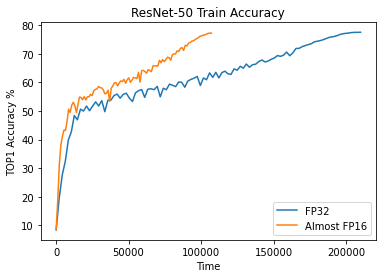

In [17]:
%matplotlib inline
%load_ext autoreload
%autoreload 2


import matplotlib.pyplot as plt
import csv
import numpy as np

time_o0 = []
val_o0 = []

time_o2 = []
val_o2 = []

# the file is recoreded using tensorboard SummaryWriter
with open('data/npu_resnet50_O0_b256_j192-tag-acc1_val.csv','r') as o0_file, open('data/npu_resnet50_O2_b256_j192-tag-acc1_val.csv','r') as o2_file:
    o0_csv = csv.reader(o0_file, delimiter=',')
    o2_csv = csv.reader(o2_file, delimiter=',')
    next(o0_csv, None)
    for row in o0_csv:
        time_o0.append(float(row[0]))
        val_o0.append(float(row[2]))
    
    next(o2_csv, None)
    for row in o2_csv:
        time_o2.append(float(row[0]))
        val_o2.append(float(row[2]))

time_o0 = np.array(time_o0)
val_o0 = np.array(val_o0)
time_o0 = time_o0 - time_o0[0]

time_o2 = np.array(time_o2)
val_o2 = np.array(val_o2)
time_o2 = time_o2 - time_o2[0]
plt.plot(time_o0, val_o0, label='FP32')
plt.plot(time_o2, val_o2, label='Almost FP16')
plt.xlabel('Time')
plt.ylabel('TOP1 Accuracy %')
plt.title('ResNet-50 Train Accuracy')
plt.legend(loc=4)
plt.show()

In [15]:
o0_75_pos = np.argmax(val_o0 > 75)
o0_75_time = time_o0[o0_75_pos]
print(f"O0 relative time to reach 75% top1 acc: {o0_75_time}")
o2_75_pos = np.argmax(val_o2 > 75)
o2_75_time = time_o2[o2_75_pos]
print(f"O2 relative time to reach 75% top1 acc: {o2_75_time}")

print(f"speedup {o0_75_time / o2_75_time}")

O0 relative time to reach 75% top1 acc: 184603.58532762527
O2 relative time to reach 75% top1 acc: 95904.97353363037
speedup 1.9248593532314728
